In [20]:
import cirq
import random
import numpy as np
from matplotlib import pyplot as plt
import sympy
import tensorflow as tf
import tensorflow_quantum as tfq

In [2]:
qubit = cirq.GridQubit(0, 0)

In [5]:
expected_labels = np.array([[1, 0], [0, 1]])

In [6]:
angle = np.random.uniform(0, 2 * np.pi)

In [9]:
a = cirq.Circuit(cirq.ry(angle)(qubit))
b = cirq.Circuit(cirq.ry(angle + np.pi / 2)(qubit))
quantum_data = tfq.convert_to_tensor([a, b])

In [12]:
q_data_input = tf.keras.Input(shape = (), dtype = tf.dtypes.string)
theta = sympy.Symbol("theta")
q_model = cirq.Circuit(cirq.ry(theta)(qubit))

In [13]:
expectation = tfq.layers.PQC(q_model, cirq.Z(qubit))
expectation_output = expectation(q_data_input)

In [14]:
classifier = tf.keras.layers.Dense(2, activation = tf.keras.activations.softmax)
classifier_output = classifier(expectation_output)

In [16]:
model = tf.keras.Model(inputs = q_data_input, 
                       outputs = classifier_output)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), 
              loss = tf.keras.losses.CategoricalCrossentropy())

In [17]:
history = model.fit(x = quantum_data, 
                    y = expected_labels, 
                    epochs = 250)

Train on 2 samples
Epoch 1/250
2/2 [==============================] - 2s 1s/sample - loss: 0.6866
Epoch 2/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.6616
Epoch 3/250
2/2 [==============================] - 0s 4ms/sample - loss: 0.6271
Epoch 4/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.5838
Epoch 5/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.5335
Epoch 6/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.4786
Epoch 7/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.4220
Epoch 8/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.3661
Epoch 9/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.3134
Epoch 10/250
2/2 [==============================] - 0s 3ms/sample - loss: 0.2660
Epoch 11/250
2/2 [==============================] - 0s 4ms/sample - loss: 0.2250
Epoch 12/250
2/2 [==============================] - 0s 4ms/sample - loss: 0.1907
Epoch 13/250
2/2 [=

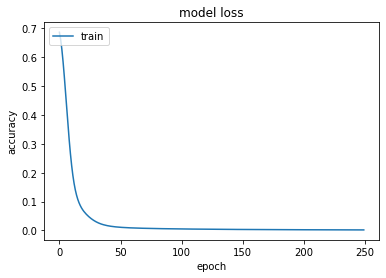

In [24]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()